# Importing Packages

In [235]:
import numpy as np
import pandas as pd
import re
import itertools
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

In [236]:
# importing stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [237]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Loading the dataset

In [238]:
news_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [239]:
# printing the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [240]:
test_dataset.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [241]:
# shape of the dataset
news_dataset.shape

(20800, 5)

In [242]:
# shape of test data
test_dataset.shape

(5200, 4)

In [243]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

Therefore there are missing values present in our dataset in title, author and text column.

In [244]:
# checking missing value in test data
test_dataset.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [245]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna(' ')
test_dataset = test_dataset.fillna(' ')

In [246]:
# merging the author name, news title
news_dataset['content'] = news_dataset['author'] + ' ' + news_dataset['title']

In [247]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
5        Daniel Nussbaum Jackie Mason: Hollywood Would ...
6          Life: Life Of Luxury: Elton John’s 6 Favorit...
7        Alissa J. Rubin Benoît Hamon Wins French Socia...
8          Excerpts From a Draft Script for Donald Trum...
9        Megan Twohey and Scott Shane A Back-Channel Pl...
10       Aaron Klein Obama’s Organizing for Action Part...
11       Chris Tomlinson BBC Comedy Sketch "Real Housew...
12       Amando Flavio Russian Researchers Discover Sec...
13       Jason Ditz US Officials See No Link Between Tr...
14       AnotherAnnie Re: Yes, There Are Paid Governmen...
15       Jack Williams In Major League Soccer, Argentin...
16       Michael Corkery and Stacy Cowley Wells Fargo C.

So we will use this 'content' coloumn for building our model

In [248]:
# printing the first 5 rows of the dataset
news_dataset.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


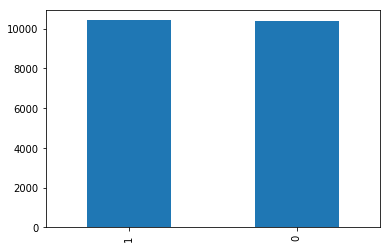

In [249]:
# Number of fake news and number of real news in our dataset
news_dataset['label'].value_counts().plot(kind = 'bar')    # bar graph

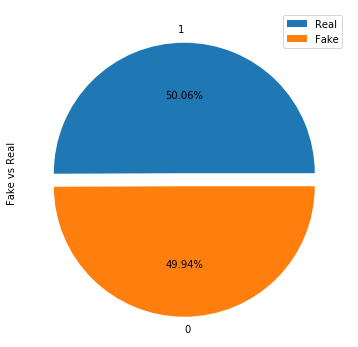

In [250]:
# Pie chart
news_dataset["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.2f%%')
plt.ylabel("Fake vs Real")
plt.legend(["Real", "Fake"])
plt.show()

In [251]:
# separating the data and label
X = news_dataset.drop(columns = 'label', axis = 1)
Y = news_dataset['label']

In [252]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
5          5  Jackie Mason: Hollywood Would Love Trump if He...   
6          6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7          7  Benoît Hamon Wins French Socialist Party’s Pre...   
8          8  Excerpts From a Draft Script for Donald Trump’...   
9          9  A Back-Channel Plan for Ukraine and Russia, Co...   
10        10  Obama’s Organizing for Action Partners with So...   
11        11  BBC Comedy Sketch "Real Housewives of ISIS" Ca...   
12        12  Russian Researchers Discover Secret Nazi Milit...   
13        13  US Officials See No Link Between Trump and Russi

In [253]:
print(Y)

0        1
1        0
2        1
3        1
4        1
5        0
6        1
7        0
8        0
9        0
10       0
11       0
12       1
13       1
14       1
15       0
16       0
17       1
18       1
19       0
20       1
21       0
22       0
23       1
24       0
25       1
26       0
27       1
28       0
29       0
        ..
20770    1
20771    1
20772    1
20773    1
20774    0
20775    1
20776    1
20777    1
20778    0
20779    0
20780    0
20781    1
20782    1
20783    0
20784    1
20785    0
20786    1
20787    0
20788    1
20789    0
20790    0
20791    1
20792    0
20793    1
20794    0
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


# Data Cleaning and Pre-processing

Stemming -> Stemming is the process of reducing a word to its Root word.

example: actor, actress, acting --> act

In [254]:
port_stem = PorterStemmer()

In [255]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [256]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [257]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
5        daniel nussbaum jacki mason hollywood would lo...
6        life life luxuri elton john favorit shark pict...
7        alissa j rubin beno hamon win french socialist...
8        excerpt draft script donald trump q ampa black...
9        megan twohey scott shane back channel plan ukr...
10       aaron klein obama organ action partner soro li...
11       chri tomlinson bbc comedi sketch real housew i...
12       amando flavio russian research discov secret n...
13              jason ditz us offici see link trump russia
14       anotheranni ye paid govern troll social media ...
15       jack william major leagu soccer argentin find ...
16       michael corkeri staci cowley well fargo chief .

In [258]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [259]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [260]:
print(Y)

[1 0 1 ... 0 1 1]


In [261]:
Y.shape

(20800,)

In [263]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [264]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

# Splitting the dataset to training & test data

In [265]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

# Training the Model: Logistic Regression

In [266]:
model = LogisticRegression()

In [267]:
model.fit(X_train, Y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Evaluation

In [268]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [269]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [270]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [271]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


# Training the model: Naive Bayes Model

Using Naive Bayes Classification techniques for predicting our model. Since Naive Bayes works very well for NLP problems

In [272]:
#import Naive Bayes algo from scikit learn
from sklearn.naive_bayes import MultinomialNB  # mulinomialNB works for multiple classes as well

In [273]:
naiveBayes_model = MultinomialNB().fit(X_train, Y_train)

In [274]:
# Now predict for test data
y_pred = naiveBayes_model.predict(X_test)

In [275]:
print(y_pred)

[1 0 1 ... 1 1 0]


# Evaluation of Naive Bayes

In [276]:
# Check accuracy of model using accuracy score
accuracy = accuracy_score(Y_test, y_pred)

In [277]:
accuracy

0.9550480769230769

it shows that our model is 95% accurate

# Predictions

In [280]:
X_new = X_test[3]

prediction = naiveBayes_model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [281]:
# checking model for some random news
news=['Four ways Bob Corker skewered Donald Trump']
news_count = vectorizer.transform(news)

In [282]:
pred = naiveBayes_model.predict(news_count)

if (pred[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

The news is Real
